# Question 1

In [9]:
import numpy as np
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
#########################################################
# Description: Simulate a channel using a digital Butterworth LPF with specified cutoff. This function
#              computes the output of the channel for the given input signal, and also adds AWGN of 
#              specified noise variance
#              
# Usage: y = channel(x,T,dt,fcut,nvar,figvar)
# Inputs: x - Input signal
#         T - Symbol duration  
#         dt - Sampling interval
#         fcut - For the digital Butterworth LPF, the 3-db cutoff is set to fcut*R/(.5 * fs), where R is the
#                symbol rate   
#         nvar - noise variance
#         figvar - If '1', the function will plot the frequency response of the filter, and the 
#                 input and ouput signals
# Output: y - Output signal y = h*x + n.
#########################################################

def channel(x,T,dt,fcut,nvar,figvar):
    fs = 1/dt 
    R = 1/T 
    Wn = fcut*R/(fs/2) 
    if Wn == 0 : 
        y = x + np.sqrt(nvar)*np.random.normal(0,1,x.size) 
    else : 
        b, a = signal.butter(5, Wn) 
        y = signal.lfilter(b, a, x) + np.sqrt(nvar)*np.random.normal(0,1,x.size) 
    if figvar == 1 : 
        f = np.arange(0,fs/2,dt) 
        w, Hf = signal.freqz(b,a,f.size)
        plt.figure()
        plt.plot(f,np.abs(Hf))
        plt.title('Frequency Response')
        plt.grid()
        plt.figure()
        plt.title('Sampled Original and Noisy Signal')
        plt.plot(x,'-')
        plt.plot(y,'--')
        plt.grid()
    return y 


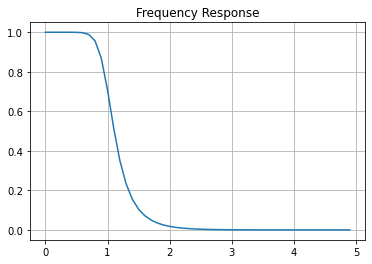

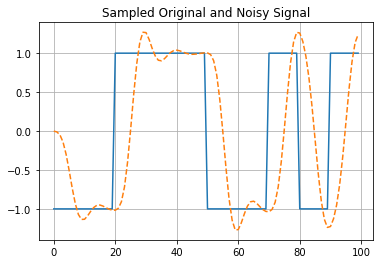

In [10]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
#x = np.random.randint(2, size=10) - 1
samples = 10
p = np.kron(x,np.ones(samples))
T = 1
dt = 0.1
fcut=1
nvar = 0
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

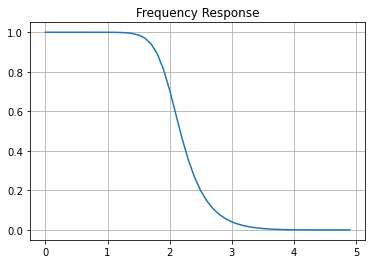

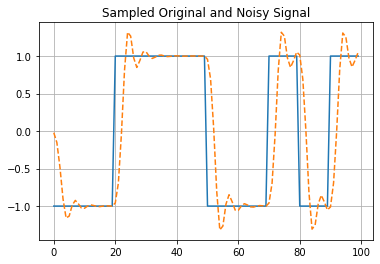

In [11]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
#x = np.random.randint(2, size=10) - 1
samples = 10
p = np.kron(x,np.ones(samples))
T = 1
dt = 0.1
fcut=2
nvar = 0
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

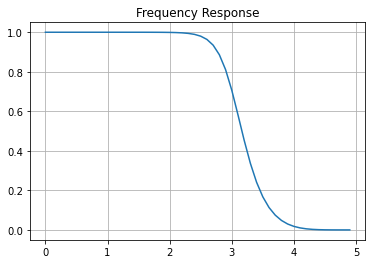

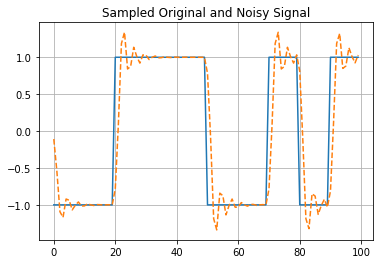

In [12]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
#x = np.random.randint(2, size=10) - 1
samples = 10
p = np.kron(x,np.ones(samples))
T = 1
dt = 0.1
fcut=3
nvar = 0
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

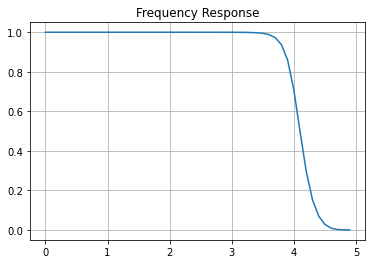

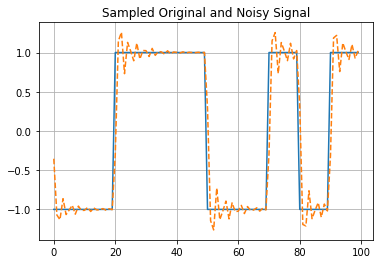

In [13]:
x = np.array([-1,-1,1,1,1,-1,-1,1,-1,1])
#x = np.random.randint(2, size=10) - 1
samples = 10
p = np.kron(x,np.ones(samples))
T = 1
dt = 0.1
fcut=4
nvar = 0
figvar=1
y = channel(p,T,dt,fcut,nvar,figvar)

# Question 2 and 3

In [85]:
def _2n3(A,n,T,samples,dt,fcut,nvar,figvar):
    count=0
    x = (2*np.random.randint(2, size=n) -1) * A
    p = np.kron(x,np.ones(samples))
    x_axis = np.arange(0,n,dt/T)
    y = channel(p,T,dt,fcut,nvar,figvar)

    #Matched Filter
    h = np.full((int(T/dt)), 2*A)

    #Recovered Signal
    received_signal = np.convolve(h,y)

    th = 0
    count=0
    recovered_sig = np.empty([n, int(T/dt)])
    for i in range(n):
        if(received_signal[int((i*samples) + (n/2))]>th):
            curr = A
        else:
            curr = -A
        if(abs(curr - x[i]) > 0.00001):
            count=count+1;
        row = np.full((1, int(T/dt)), curr)
        recovered_sig[i] = row;
    recovered_sig = np.reshape(recovered_sig,(n*int(T/dt)))
    if figvar == 1:
        plt.figure()
        plt.grid()
        plt.plot(x_axis,recovered_sig)
        plt.title('Reconstructed')
        plt.show()

    count=0
    experiments = 100
    for i in range(experiments):
        x = (2*np.random.randint(2, size=n) -1) * A
        p = np.kron(x,np.ones(samples))
        x_axis = np.arange(0,n,dt/T)
        figvar=0
        y = channel(p,T,dt,fcut,nvar,0)

        #Matched Filter
        h = np.full((int(T/dt)), 2*A)

        #Recovered Signal
        received_signal = np.convolve(h,y)

        th = 0
        recovered_sig = np.empty([n, int(T/dt)])
        for i in range(n):
            if(received_signal[int((i*samples) + (n/2))]>th):
                curr = A
            else:
                curr = -A
            if(abs(curr - x[i]) > 0.00001):
                count=count+1;
            row = np.full((1, int(T/dt)), curr)
            recovered_sig[i] = row;
        recovered_sig = np.reshape(recovered_sig,(n*int(T/dt)))
    error = count/(n*experiments)
    if figvar == 1:
        print('bits interpreted incorrectly in 100 experiments:',error)
    return error

In [93]:
def _3(A,n,T,samples,dt,fcut,nvar,figvar):
    
    #Cutoff frequency v/s bit error probability graph
    nvar = 1;
    freqcut = np.arange(0.5,4.5,0.1)
    val = np.empty([freqcut.shape[0]])
    for j in range(freqcut.shape[0]):
        val[j] = _2n3(A,n,T,samples,dt,freqcut[j],nvar,figvar)
    
    plt.figure
    plt.plot(freqcut,val)
    plt.title('Cutoff frequency v/s bit error probability')
    plt.show()
    
    #Variance v/s bit error probability graph
    fcut = 1.5
    variance = np.arange(0,10,0.1)
    val = np.empty([variance.shape[0]])
    for j in range(variance.shape[0]):
        val[j] = _2n3(A,n,T,samples,dt,fcut,variance[j],figvar)
    
    plt.figure
    plt.plot(variance,val)
    plt.title('Variance v/s bit error probability')
    plt.show()
    
    #Amplitude v/s bit error probability graph
    amplitude = np.arange(0.1,10,0.1)
    val = np.empty([amplitude.shape[0]])
    for j in range(amplitude.shape[0]):
        val[j] = _2n3(amplitude[j],n,T,samples,dt,fcut,nvar,figvar)
    
    plt.figure
    plt.plot(amplitude,val)
    plt.title('Amplitude v/s bit error probability')
    plt.show()

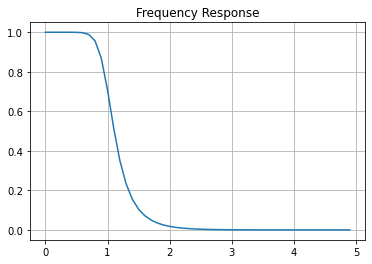

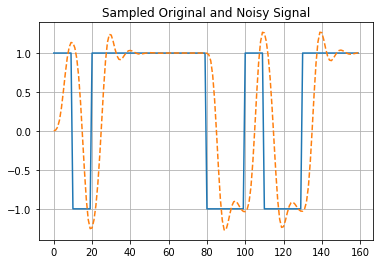

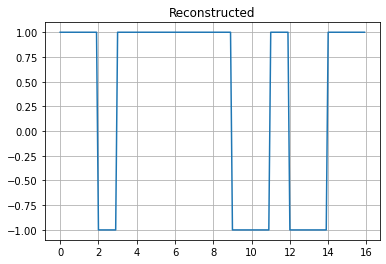

0.465

In [89]:
A = 1
n = 16
T = 1
samples = 10
dt = 1/samples
fcut=1
nvar = 0
figvar=1
_2n3(A,n,T,samples,dt,fcut,nvar,figvar)

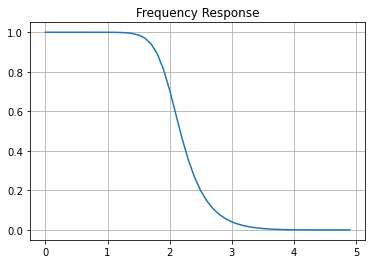

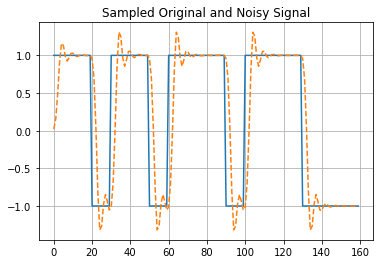

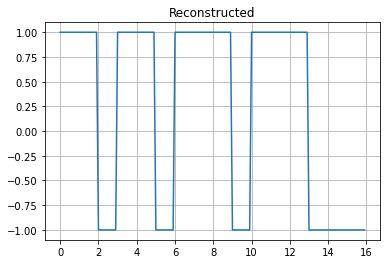

0.0

In [91]:
A = 1
n = 16
T = 1
dt = 1/samples
fcut=2
nvar = 0
samples = 10
figvar=1
_2n3(A,n,T,samples,dt,fcut,nvar,figvar)

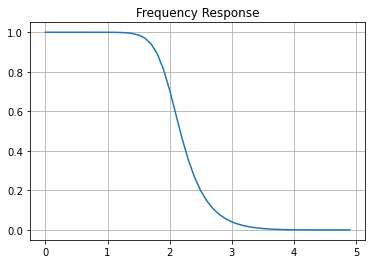

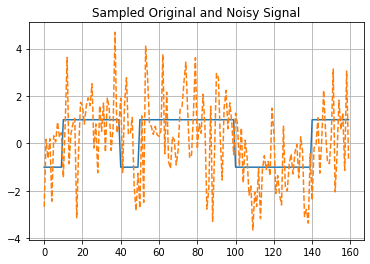

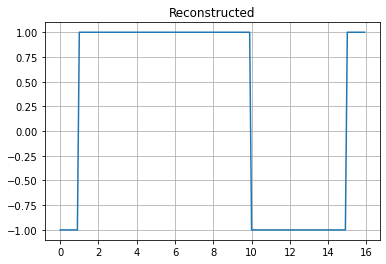

% of bits interpreted incorrectly in 1000 experiments: 11.2125


In [32]:
A = 1
n = 16
T = 1
dt = 1/samples
fcut=2
nvar = 2
samples = 10
figvar=1
_2n3(A,n,T,samples,dt,fcut,nvar,figvar)

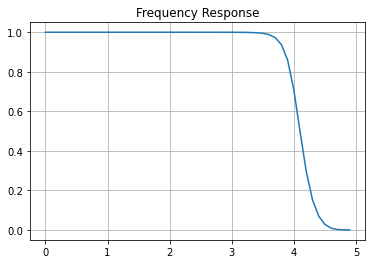

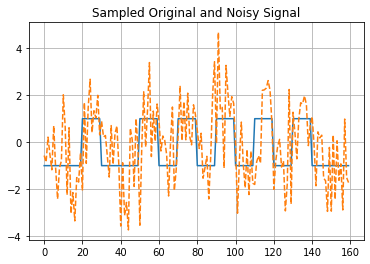

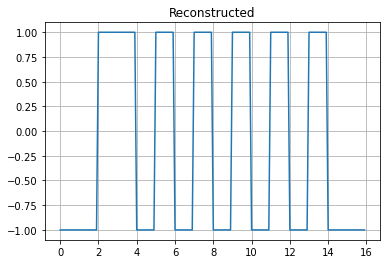

% of bits interpreted incorrectly in 1000 experiments: 3.58125


In [36]:
A = 1
n = 16
T = 1
dt = 1/samples
fcut=4
nvar = 2
samples = 10
figvar=1
_2n3(A,n,T,samples,dt,fcut,nvar,figvar)

# question 3, last part

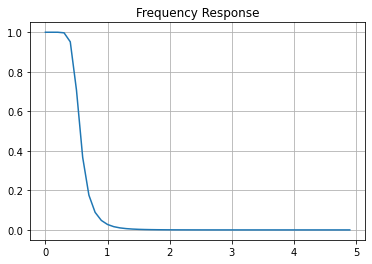

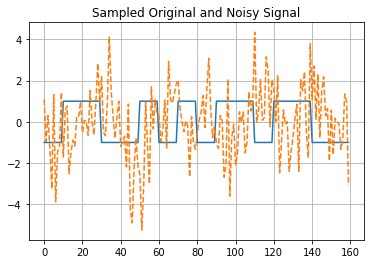

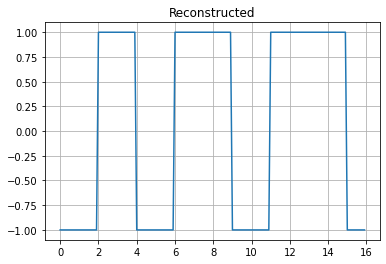

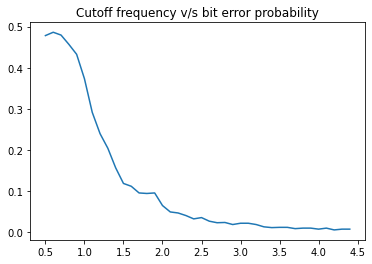

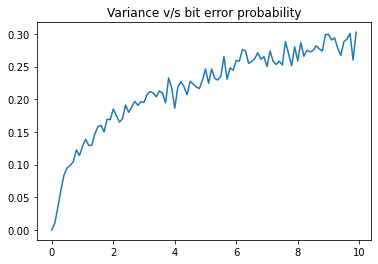

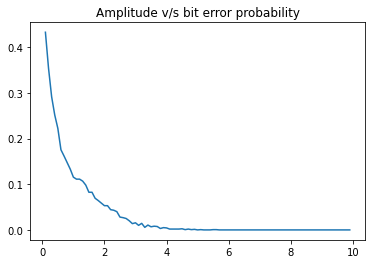

In [94]:
A = 1
n = 16
T = 1
dt = 1/samples
fcut=0.5
nvar = 2
samples = 10
figvar=1
_2n3(A,n,T,samples,dt,fcut,nvar,figvar)
figvar=0
_3(A,n,T,samples,dt,fcut,nvar,figvar)